# Dealing with imbalanced data

In this section, we will apply some SMOTE techniques to the training data in order to solve the highly imbalanced data problem.

We will try several SMOTE techniques to generate some datasets. Then, these datasets will be compared using some data-quality metrics (using `problexity` library)

The SMOTE techniques that we will use are:
- **Borderline SMOTE** (over-sampling the minority class reinforcing the border between the classes)
- **ADASYN** (Adaptive Synthetic Sampling: focuses on generating samples of minotiy class that are harder to classify)
- **SMOTE-TL** (SMOTE Tomek Links: combines over-sampling of the minority class with under-sampling of the majority class by removing Tomek links)
- **SMOTE-ENN** (SMOTE Edited Nearest Neighbors: combines over-sampling of the minority class with under-sampling of the majority class by cleaning the majority class with ENN)
- **SMOTE-SVM** (SMOTE Support Vector Machine: uses SVM to generate synthetic samples)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import problexity as pbx
from imblearn.over_sampling import BorderlineSMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

In [23]:
df = pd.read_csv('../data/customer_cleaned.csv')
df.head()

,sex,is_employed,income,health_ins,num_vehicles,age,state_of_res,gas_usage,rooms,marital_status_Divorced/Separated,marital_status_Married,marital_status_Never married,marital_status_Widowed,housing_type_Homeowner free and clear,housing_type_Homeowner with mortgage/loan,housing_type_Occupied with no rent,housing_type_Rented
0,1,1,-0.34,1,0.00,0.04,0,2.71,0.4,0,0,1,0,1,0,0,0
1,0,0,-0.32,1,0.00,0.78,0,-0.60,1.0,1,0,0,0,0,0,0,1
2,0,1,-0.36,1,0.33,0.13,0,-0.01,0.4,0,0,1,0,0,1,0,0
3,0,0,-0.07,1,0.17,0.92,0,1.27,0.2,0,0,0,1,1,0,0,0
4,1,1,-0.05,1,0.33,0.59,0,-0.60,0.2,1,0,0,0,0,0,0,1


In [24]:
X = df.drop('health_ins', axis=1)
y = df['health_ins']

In [25]:
# Number of cases and percentage of each class in the original dataset
print(f"Original dataset: {y.value_counts()}")
print(f"Percentage of each class in the original dataset: {y.value_counts(normalize=True)}")

Original dataset: health_ins
1    65553
0     6905
Name: count, dtype: int64
Percentage of each class in the original dataset: health_ins
1    0.904703
0    0.095297
Name: proportion, dtype: float64


## SMOTE Edited Nearest Neighbors (SMOTE-ENN)

In [26]:
smote_enn = SMOTEENN(random_state=42)
X_resampled_smoteenn, y_resampled_smoteenn = smote_enn.fit_resample(X, y)
print(f"SMOTEENN dataset: {y_resampled_smoteenn.value_counts()}")
print(f"Percentage of each class in the SMOTEENN dataset: {y_resampled_smoteenn.value_counts(normalize=True)}")

SMOTEENN dataset: health_ins
0    59340
1    46879
Name: count, dtype: int64
Percentage of each class in the SMOTEENN dataset: health_ins
0    0.558657
1    0.441343
Name: proportion, dtype: float64


## SMOTE Tomek Links (SMOTE-TL)

In [27]:
smote_tl = SMOTETomek(random_state=42)
X_resampled_smotetl, y_resampled_smotetl = smote_tl.fit_resample(X, y)
print(f"SMOTETomek dataset: {y_resampled_smotetl.value_counts()}")
print(f"Percentage of each class in the SMOTETomek dataset: {y_resampled_smotetl.value_counts(normalize=True)}")

SMOTETomek dataset: health_ins
1    64756
0    64756
Name: count, dtype: int64
Percentage of each class in the SMOTETomek dataset: health_ins
1    0.5
0    0.5
Name: proportion, dtype: float64


## Borderline SMOTE

In [28]:
borderline_smote = BorderlineSMOTE(random_state=42)
X_resampled_borderline, y_resampled_borderline = borderline_smote.fit_resample(X, y)
print(f"BorderlineSMOTE dataset: {y_resampled_borderline.value_counts()}")
print(f"Percentage of each class in the BorderlineSMOTE dataset: {y_resampled_borderline.value_counts(normalize=True)}")

BorderlineSMOTE dataset: health_ins
1    65553
0    65553
Name: count, dtype: int64
Percentage of each class in the BorderlineSMOTE dataset: health_ins
1    0.5
0    0.5
Name: proportion, dtype: float64


## Borderline SMOTE over SMOTE-ENN

In [29]:
X_resampled_enn_borderline, y_resampled_enn_borderline = borderline_smote.fit_resample(X_resampled_smoteenn, y_resampled_smoteenn)
print(f"BorderlineSMOTE + ENN dataset: {y_resampled_enn_borderline.value_counts()}")
print(f"Percentage of each class in the BorderlineSMOTE + ENN dataset: {y_resampled_enn_borderline.value_counts(normalize=True)}")

BorderlineSMOTE + ENN dataset: health_ins
0    59340
1    59340
Name: count, dtype: int64
Percentage of each class in the BorderlineSMOTE + ENN dataset: health_ins
0    0.5
1    0.5
Name: proportion, dtype: float64


## ADASYN

In [30]:
adasyn_smote = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn_smote.fit_resample(X, y)
print(f"ADASYN dataset: {y_resampled_adasyn.value_counts()}")
print(f"Percentage of each class in the ADASYN dataset: {y_resampled_adasyn.value_counts(normalize=True)}")

ADASYN dataset: health_ins
0    66286
1    65553
Name: count, dtype: int64
Percentage of each class in the ADASYN dataset: health_ins
0    0.50278
1    0.49722
Name: proportion, dtype: float64


## SMOTE-SVM //TODO

In [36]:
# smote svm code

## Comparison of the datasets

In [31]:
datasets = {
    'original': (X, y),
    'smote-enn': (X_resampled_smoteenn, y_resampled_smoteenn),
    'borderline': (X_resampled_borderline, y_resampled_borderline),
    'smote-tl': (X_resampled_smotetl, y_resampled_smotetl),
    'enn-borderline': (X_resampled_enn_borderline, y_resampled_enn_borderline),
    'adasyn-smote': (X_resampled_adasyn, y_resampled_adasyn)
    # 'smote-svm': (X_resampled_svm, y_resampled_svm)
}

fb_measures = pd.DataFrame([], columns=['dataset', 'f1', 'f2', 'f3', 'f4'])

for dataset, (X, y) in datasets.items():
    print(f'Calculating metrics for {dataset}')
    f1 = round(pbx.f1(X, y),3)
    f2 = round(pbx.f2(X, y),3)
    f3 = round(pbx.f3(X, y),3)
    f4 = round(pbx.f4(X, y),3)
    fb_measures.loc[len(fb_measures)] = [dataset, f1, f2, f3, f4]

fb_measures

Calculating metrics for original
Calculating metrics for smote-enn
Calculating metrics for borderline
Calculating metrics for smote-tl
Calculating metrics for enn-borderline
Calculating metrics for adasyn-smote


,dataset,f1,f2,f3,f4
0,original,0.943,0.288,0.995,0.994
1,smote-enn,0.694,0.280,0.996,0.996
2,borderline,0.770,0.288,0.997,0.997
3,smote-tl,0.790,0.288,0.997,0.997
4,enn-borderline,0.739,0.280,0.996,0.996
5,adasyn-smote,0.807,0.288,0.997,0.997


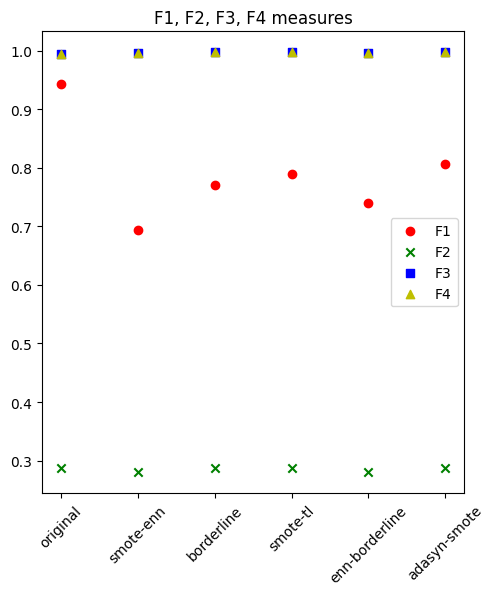

In [32]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(fb_measures['dataset'], fb_measures['f1'], color='r', label='F1', marker='o')
plt.scatter(fb_measures['dataset'], fb_measures['f2'], color='g', label='F2', marker='x')
plt.scatter(fb_measures['dataset'], fb_measures['f3'], color='b', label='F3', marker='s')
plt.scatter(fb_measures['dataset'], fb_measures['f4'], color='y', label='F4', marker='^')
plt.xticks(rotation=45)
plt.legend()
plt.title('F1, F2, F3, F4 measures')
plt.show()

Remembering the meaning of each measure:
- **F1**: class separability
- **F2**: feature overlap
- **F3**: best single feature
- **F4**: combined feature effectiveness

In [35]:
df_balanced = pd.concat([X_resampled_adasyn, y_resampled_adasyn], axis=1)
df_balanced.to_csv('../data/balanced.csv', index=False)

We have choosen the dataset generated by **ADASYN** as the best one. It is saved in the file `balanced.csv` in order to be used in next steps for training models.